We're working for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

Rather than run surveys, which is expensive, we can search for existing data relevant to our purpose.

[freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their [survey](https://github.com/freeCodeCamp/2017-new-coder-survey) attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline

In [3]:
survey_data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
pd.options.display.max_columns = 150
survey_data.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

For the purposes of analysis, we want to know about the population of new coders that are interested in the subjects we teach. We need to know:
- Where these new coders are located
- What are the locations with the greatest numbers of new coders
- How much money new coders are willing to spend on learning

But first, we have to establish whether this sample is representative of the population of interest

In [4]:
survey_data["JobRoleInterest"]

0                                                      NaN
1                                 Full-Stack Web Developer
2          Front-End Web Developer, Back-End Web Develo...
3          Front-End Web Developer, Full-Stack Web Deve...
4        Full-Stack Web Developer, Information Security...
5                                                      NaN
6                                 Full-Stack Web Developer
7                                                      NaN
8                                                      NaN
9        Full-Stack Web Developer,   Quality Assurance ...
10                                                     NaN
11         DevOps / SysAdmin,   Data Scientist, Informa...
12                                                     NaN
13       Back-End Web Developer, Full-Stack Web Develop...
14                                Full-Stack Web Developer
15                                Full-Stack Web Developer
16                                Full-Stack Web Develop

The structure of the survey allowed respondents to select more than one job role that they're interested in. We're interested here in only drilling down to individual *responses*, not necessarily individual subjects.

Let's clean the data up a bit, and then isolate and visualize how many respondents mentioned at least one of the two categories (Mobile or Web Development).

In [5]:
survey_data_no_nulls = survey_data[survey_data["JobRoleInterest"].notnull()]

In [6]:
wm_dev = survey_data_no_nulls["JobRoleInterest"].str.contains("Web Developer|Mobile Developer").value_counts(normalize=True)*100

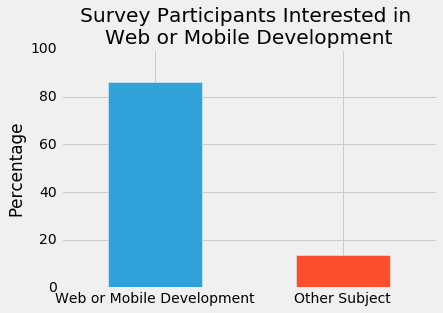

In [7]:
plt.style.use('fivethirtyeight')
wm_dev.plot.bar()
plt.ylabel("Percentage")
plt.ylim([0,100])
plt.xticks([0,1], ["Web or Mobile Development", "Other Subject"], rotation=0)
plt.title("Survey Participants Interested in \nWeb or Mobile Development")
plt.show()

Turns out that most survey participants (over 86%) are interested in web or mobile development. This sample is representative of our population of interest, as our programming courses will be directed towards people interested in either of the two subjects.

To reiterate, the goal of this analysis is to find out which markets to advertise our services in. We need to find out where these new coders are located, and the densities for each location.

We're interested in the `CountryLive` variable, as we want to target areas where large amounts of coders live right now. In addition to this, we want to find out where the largest markets are so we can be sure our advertising reaches the largest number of potential customers.

In [8]:
country_freq = survey_data_no_nulls["CountryLive"].value_counts()
country_freq_rel = survey_data_no_nulls["CountryLive"].value_counts(normalize=True)*100

pd.DataFrame({"absolute_frequency": country_freq, "relative_frequency": country_freq_rel})

,absolute_frequency,relative_frequency
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


45% of respondents live in the USA. Second place goes to India, at 7.7% of respondents. 

The other question we have to ask is, what are new coders willing to spend in order to learn? This is a business after all. We'll look to the `MoneyForLearning` column to find out, and narrow our search to the USA, India, UK and Canada. English is an official language in these countries, the same language our advertising and our courses will be in.

In [10]:
survey_data_no_nulls["MoneyPerMonth"] = survey_data_no_nulls["MoneyForLearning"] / survey_data_no_nulls["MonthsProgramming"].replace(0, 1)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [12]:
per_month = survey_data_no_nulls[survey_data_no_nulls["MoneyPerMonth"].notnull()]

In [13]:
per_month = per_month[per_month["CountryLive"].notnull()]

In [22]:
month_mean = per_month.groupby(by="CountryLive")["MoneyPerMonth"].mean()
month_mean[["United States of America", "India", "United Kingdom", "Canada"]]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

It's a slightly unexpected result given how the GDP of India compares to the UK or Canada. We'll have to dive deeper into the data to see if there's any outliers skewing the results.

In [24]:
countries = "United States of America|India|United Kingdom|Canada"
per_month_top_4 = per_month[per_month["CountryLive"].str.contains(countries)]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



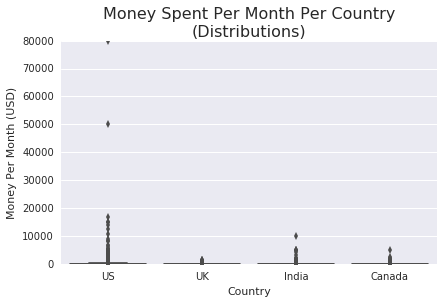

In [27]:
sns.boxplot(data=per_month_top_4, x="CountryLive", y="MoneyPerMonth")
plt.title("Money Spent Per Month Per Country\n(Distributions)", fontsize=16)
plt.ylabel("Money Per Month (USD)")
plt.xlabel("Country")
plt.xticks(range(4), ["US", "UK", "India", "Canada"])
plt.show()

It's highly suspect that anyone is spending over 20,000 a month on their education. Let's restrict the data to less than 20,000 and then rerun:

In [28]:
per_month_top_4 = per_month_top_4[per_month_top_4["MoneyPerMonth"] < 20000]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



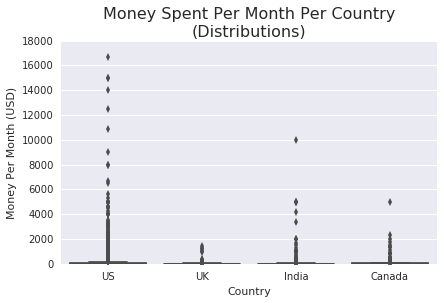

In [29]:
sns.boxplot(data=per_month_top_4, x="CountryLive", y="MoneyPerMonth")
plt.title("Money Spent Per Month Per Country\n(Distributions)", fontsize=16)
plt.ylabel("Money Per Month (USD)")
plt.xlabel("Country")
plt.xticks(range(4), ["US", "UK", "India", "Canada"])
plt.show()

Let's check the Indian outliers who are spending over 2500/month on their education. It's possible they attended bootcamps?

In [47]:
india_outliers = per_month_top_4[(per_month_top_4["CountryLive"]=="India") & (per_month_top_4["MoneyPerMonth"] > 2500)]
top_4 = top_4.drop(india_outliers.index)

None of these people attended bootcamps, but the original phrasing of the question is "*Aside from univeristy tuition, how much money have you spent on learning to code so far (in US dollars)?*". It's possible they did not read the question correctly, so we can throw out this data.

Next, we'll examine any outliers in the USA that spend over $6000 monthly:

In [41]:
usa_outliers = per_month_top_4[(per_month_top_4["CountryLive"]=="United States of America") & (per_month_top_4["MoneyPerMonth"] > 6000)]
usa_outliers[["AttendedBootcamp", "MonthsProgramming", "MoneyPerMonth"]]

,AttendedBootcamp,MonthsProgramming,MoneyPerMonth
718,1.0,1.0,8000.000000
1222,1.0,2.0,6500.000000
3184,1.0,0.0,9000.000000
3930,0.0,6.0,10833.333333
6805,1.0,1.0,15000.000000
7198,0.0,5.0,14000.000000
7505,1.0,3.0,6666.666667
9778,1.0,1.0,8000.000000
16650,0.0,12.0,16666.666667
16997,0.0,1.0,12500.000000


It's hard to see how anyone who didn't attend a bootcamp managed to spend so much money on learning. In light of this, we'll remove these 5 outliers.

In addition to this, some of the outliers who stated that they did attend a bootcamp and have been coding for a short amount of time probably paid a large sum the first month, and haven't paid anything since. We can remove these outliers as well.

In [46]:
usa_outliers = usa_outliers[((usa_outliers["AttendedBootcamp"] == 1)
                            & (usa_outliers["MonthsProgramming"] <= 3))
                           | (usa_outliers["AttendedBootcamp"] == 0)]
top_4 = per_month_top_4.drop(usa_outliers.index)

Finally we can take a look at the lone Canadian outlier:

In [50]:
canada_outliers = top_4[(top_4["CountryLive"] == "Canada") & (top_4["MoneyPerMonth"] > 4000)]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This is another case of having attended a bootcamp and having only been coding for 2 months. We can safely remove this outlier, then recalculate all our averages:

In [55]:
top_4 = top_4.drop(canada_outliers.index)

In [56]:
top_4.groupby("CountryLive")["MoneyPerMonth"].mean()

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneyPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



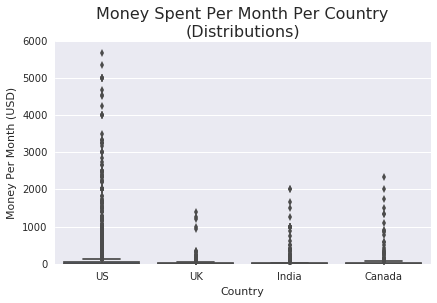

In [57]:
sns.boxplot(data=top_4, x="CountryLive", y="MoneyPerMonth")
plt.title("Money Spent Per Month Per Country\n(Distributions)", fontsize=16)
plt.ylabel("Money Per Month (USD)")
plt.xlabel("Country")
plt.xticks(range(4), ["US", "UK", "India", "Canada"])
plt.show()

That's more like it!

Just looking at the money per month numbers, Canada & the USA are the best countries for us to run our advertising campaign in.

However, we should also consider the populations of the countries:

In [58]:
top_4["CountryLive"].value_counts(normalize=True)*100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

We had nearly twice as many respondents from India as we did from Canada, and India's average figure of \$65 per month spent on learning to code is still higher than the $59 we will be charging for our services.

At this point it's a question for our marketing department. Perhaps additional domain knowledge is required to answer this question, but we have done our part.

A possible solution is to split the advertising budget as a weighted average across the USA, India and Canada:

-60% of the advertising budget to the USA
-25% to India
-15% to Canada

We leave this up to the marketing department's discretion. 